<a href="https://colab.research.google.com/github/mariam851/covid19-visualization-project/blob/main/covid19_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium import plugins
plt.rcParams['figure.figsize'] = 10, 12
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Covid cases in India.xlsx to Covid cases in India.xlsx
Saving covid_19_data.csv to covid_19_data.csv
Saving COVID19_line_list_data.csv to COVID19_line_list_data.csv
Saving COVID19_open_line_list.csv to COVID19_open_line_list.csv
Saving Covid19-Data Analysis.ipynb to Covid19-Data Analysis.ipynb
Saving Data.csv to Data.csv
Saving Imp.txt to Imp.txt
Saving Indian Coordinates.xlsx to Indian Coordinates.xlsx
Saving per_day_cases.xlsx to per_day_cases.xlsx
Saving README.md to README.md
Saving recent_covid_19_data.csv to recent_covid_19_data.csv
Saving time_series_covid_19_confirmed.csv to time_series_covid_19_confirmed.csv
Saving time_series_covid_19_deaths.csv to time_series_covid_19_deaths.csv
Saving time_series_covid_19_recovered.csv to time_series_covid_19_recovered.csv
Saving time-series-19-covid-combined.csv to time-series-19-covid-combined.csv


In [3]:
df= pd.read_excel('Covid cases in India.xlsx')
df

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,12,0,1,0
1,2,Chhattisgarh,6,0,0,0
2,3,Delhi,38,1,6,1
3,4,Gujarat,43,0,0,3
4,5,Haryana,16,14,11,0
5,6,Himachal Pradesh,4,0,0,1
6,7,Karnataka,20,0,3,2
7,8,Kerala,131,7,11,0
8,9,Madhya Pradesh,23,0,0,1
9,10,Maharashtra,144,3,15,4


In [4]:
df.drop(['S. No.'],axis=1,inplace=True)
df['Total cases']=df['Total Confirmed cases (Indian National)']+df['Total Confirmed cases ( Foreign National )']
total_cases=df['Total cases'].sum()
print('The total number of cases till now in India is',total_cases)

The total number of cases till now in India is 729


In [ ]:
df

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total cases
0,Andhra Pradesh,12,0,1,0,12
1,Chhattisgarh,6,0,0,0,6
2,Delhi,38,1,6,1,39
3,Gujarat,43,0,0,3,43
4,Haryana,16,14,11,0,30
5,Himachal Pradesh,4,0,0,1,4
6,Karnataka,20,0,3,2,20
7,Kerala,131,7,11,0,138
8,Madhya Pradesh,23,0,0,1,23
9,Maharashtra,144,3,15,4,147


In [5]:
India_coord = pd.read_excel('/content/Indian Coordinates.xlsx')
dbd_India = pd.read_excel('/content/per_day_cases.xlsx',parse_dates=True, sheet_name='India')
dbd_Italy = pd.read_excel('/content/per_day_cases.xlsx',parse_dates=True, sheet_name="Italy")
dbd_Korea = pd.read_excel('/content/per_day_cases.xlsx',parse_dates=True, sheet_name="Korea")
dbd_Wuhan = pd.read_excel('/content/per_day_cases.xlsx',parse_dates=True, sheet_name="Wuhan")

In [ ]:
# TOTAL CASES IN INDIA

df.style.background_gradient(cmap='Reds')

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total cases
0,Andhra Pradesh,12,0,1,0,12
1,Chhattisgarh,6,0,0,0,6
2,Delhi,38,1,6,1,39
3,Gujarat,43,0,0,3,43
4,Haryana,16,14,11,0,30
5,Himachal Pradesh,4,0,0,1,4
6,Karnataka,20,0,3,2,20
7,Kerala,131,7,11,0,138
8,Madhya Pradesh,23,0,0,1,23
9,Maharashtra,144,3,15,4,147


In [6]:
# TOTAL ACTIVE CASES

df['Total Active'] = df['Total cases'] - (df['Death'] + df['Cured'])
total_active = df['Total Active'].sum()
print('Total number of active COVID 2019 cases across India:', total_active)
Tot_Cases = df.groupby('Name of State / UT')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

Total number of active COVID 2019 cases across India: 648


,Total Active
Name of State / UT,
Maharashtra,128
Kerala,127
Telengana,44
Rajasthan,40
Gujarat,40
Tamil Nadu,33
Uttar Pradesh,32
Delhi,32
Punjab,28


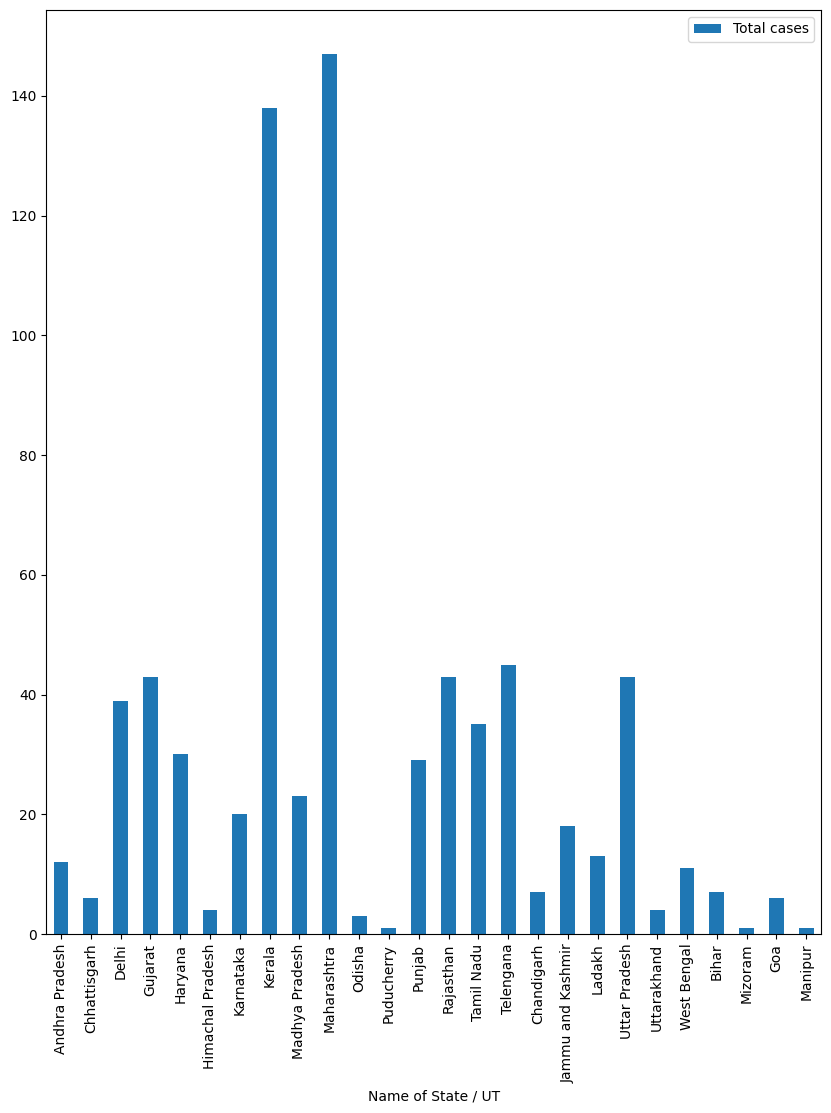

In [7]:
df.plot(kind='bar', x='Name of State / UT', y='Total cases')
plt.show()



<BarContainer object of 26 artists>

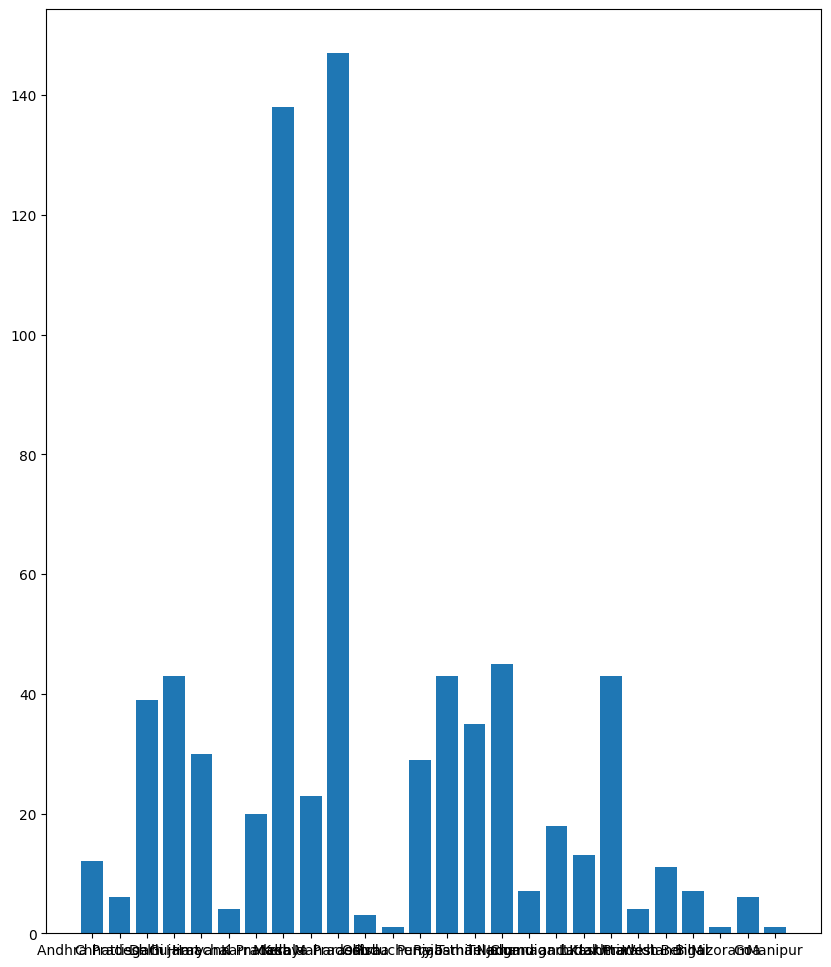

In [8]:
plt.bar(df['Name of State / UT'], df['Total cases'])

In [9]:
px.bar(df, x='Name of State / UT', y='Total cases')

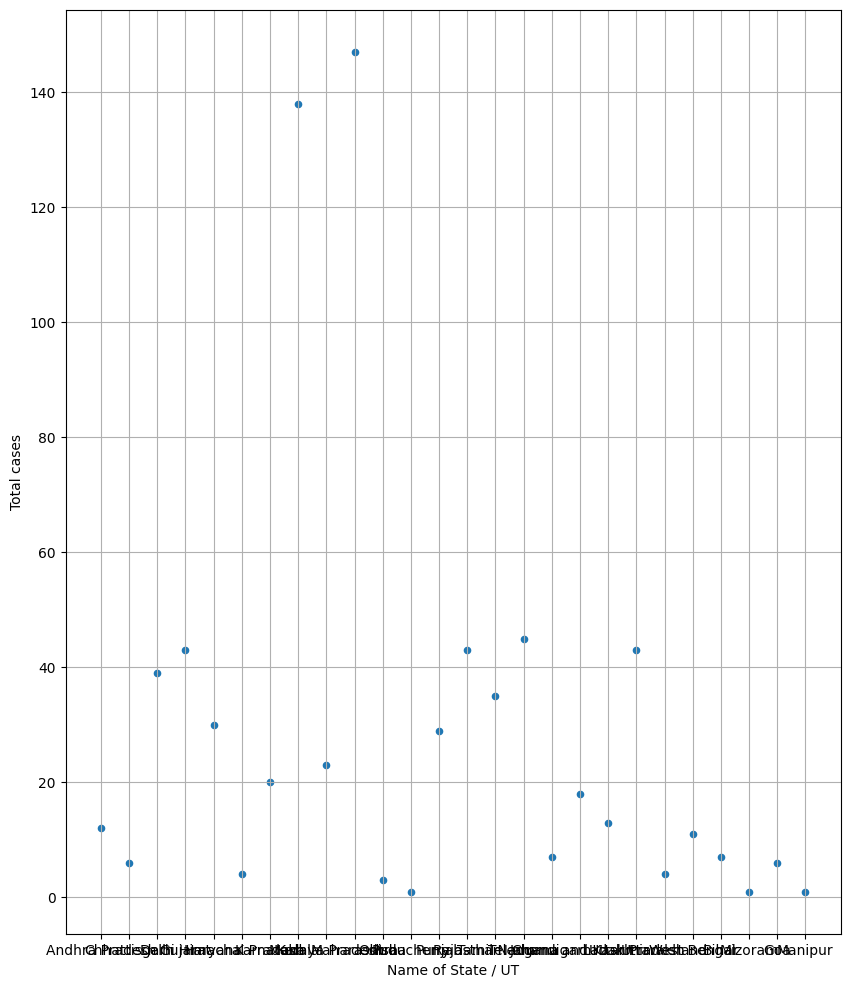

In [10]:
df.plot(kind='scatter',x='Name of State / UT',y='Total cases')
plt.grid(True)

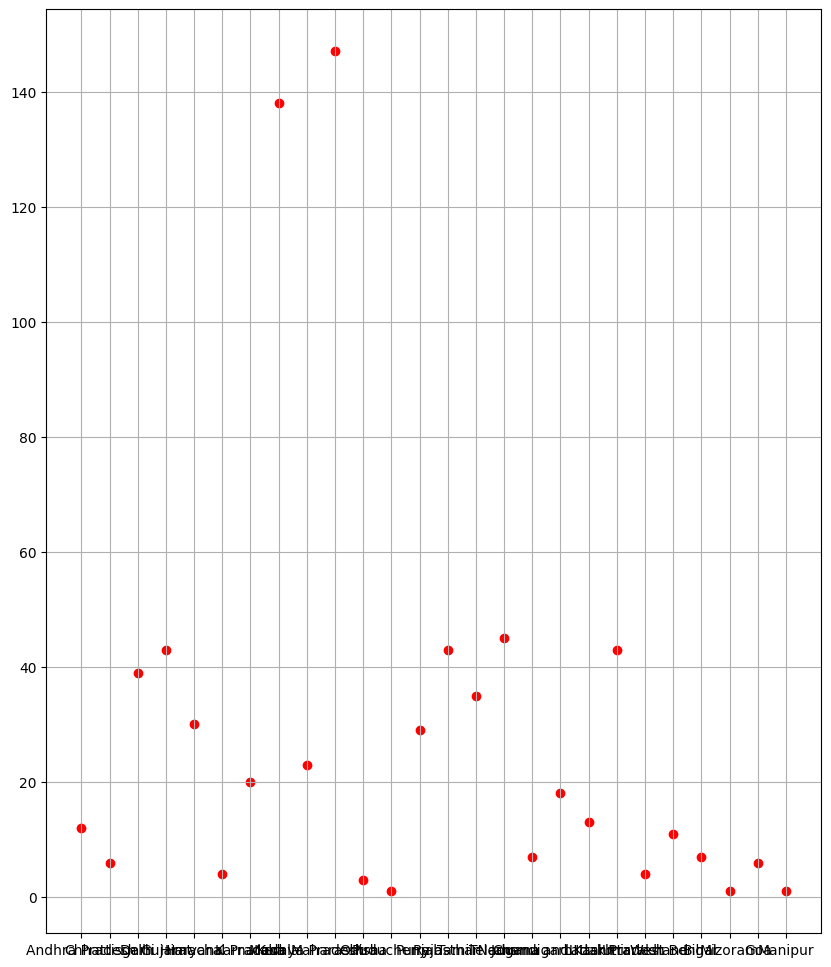

In [11]:
plt.scatter(df['Name of State / UT'], df['Total cases'], color='red')
plt.grid(True)

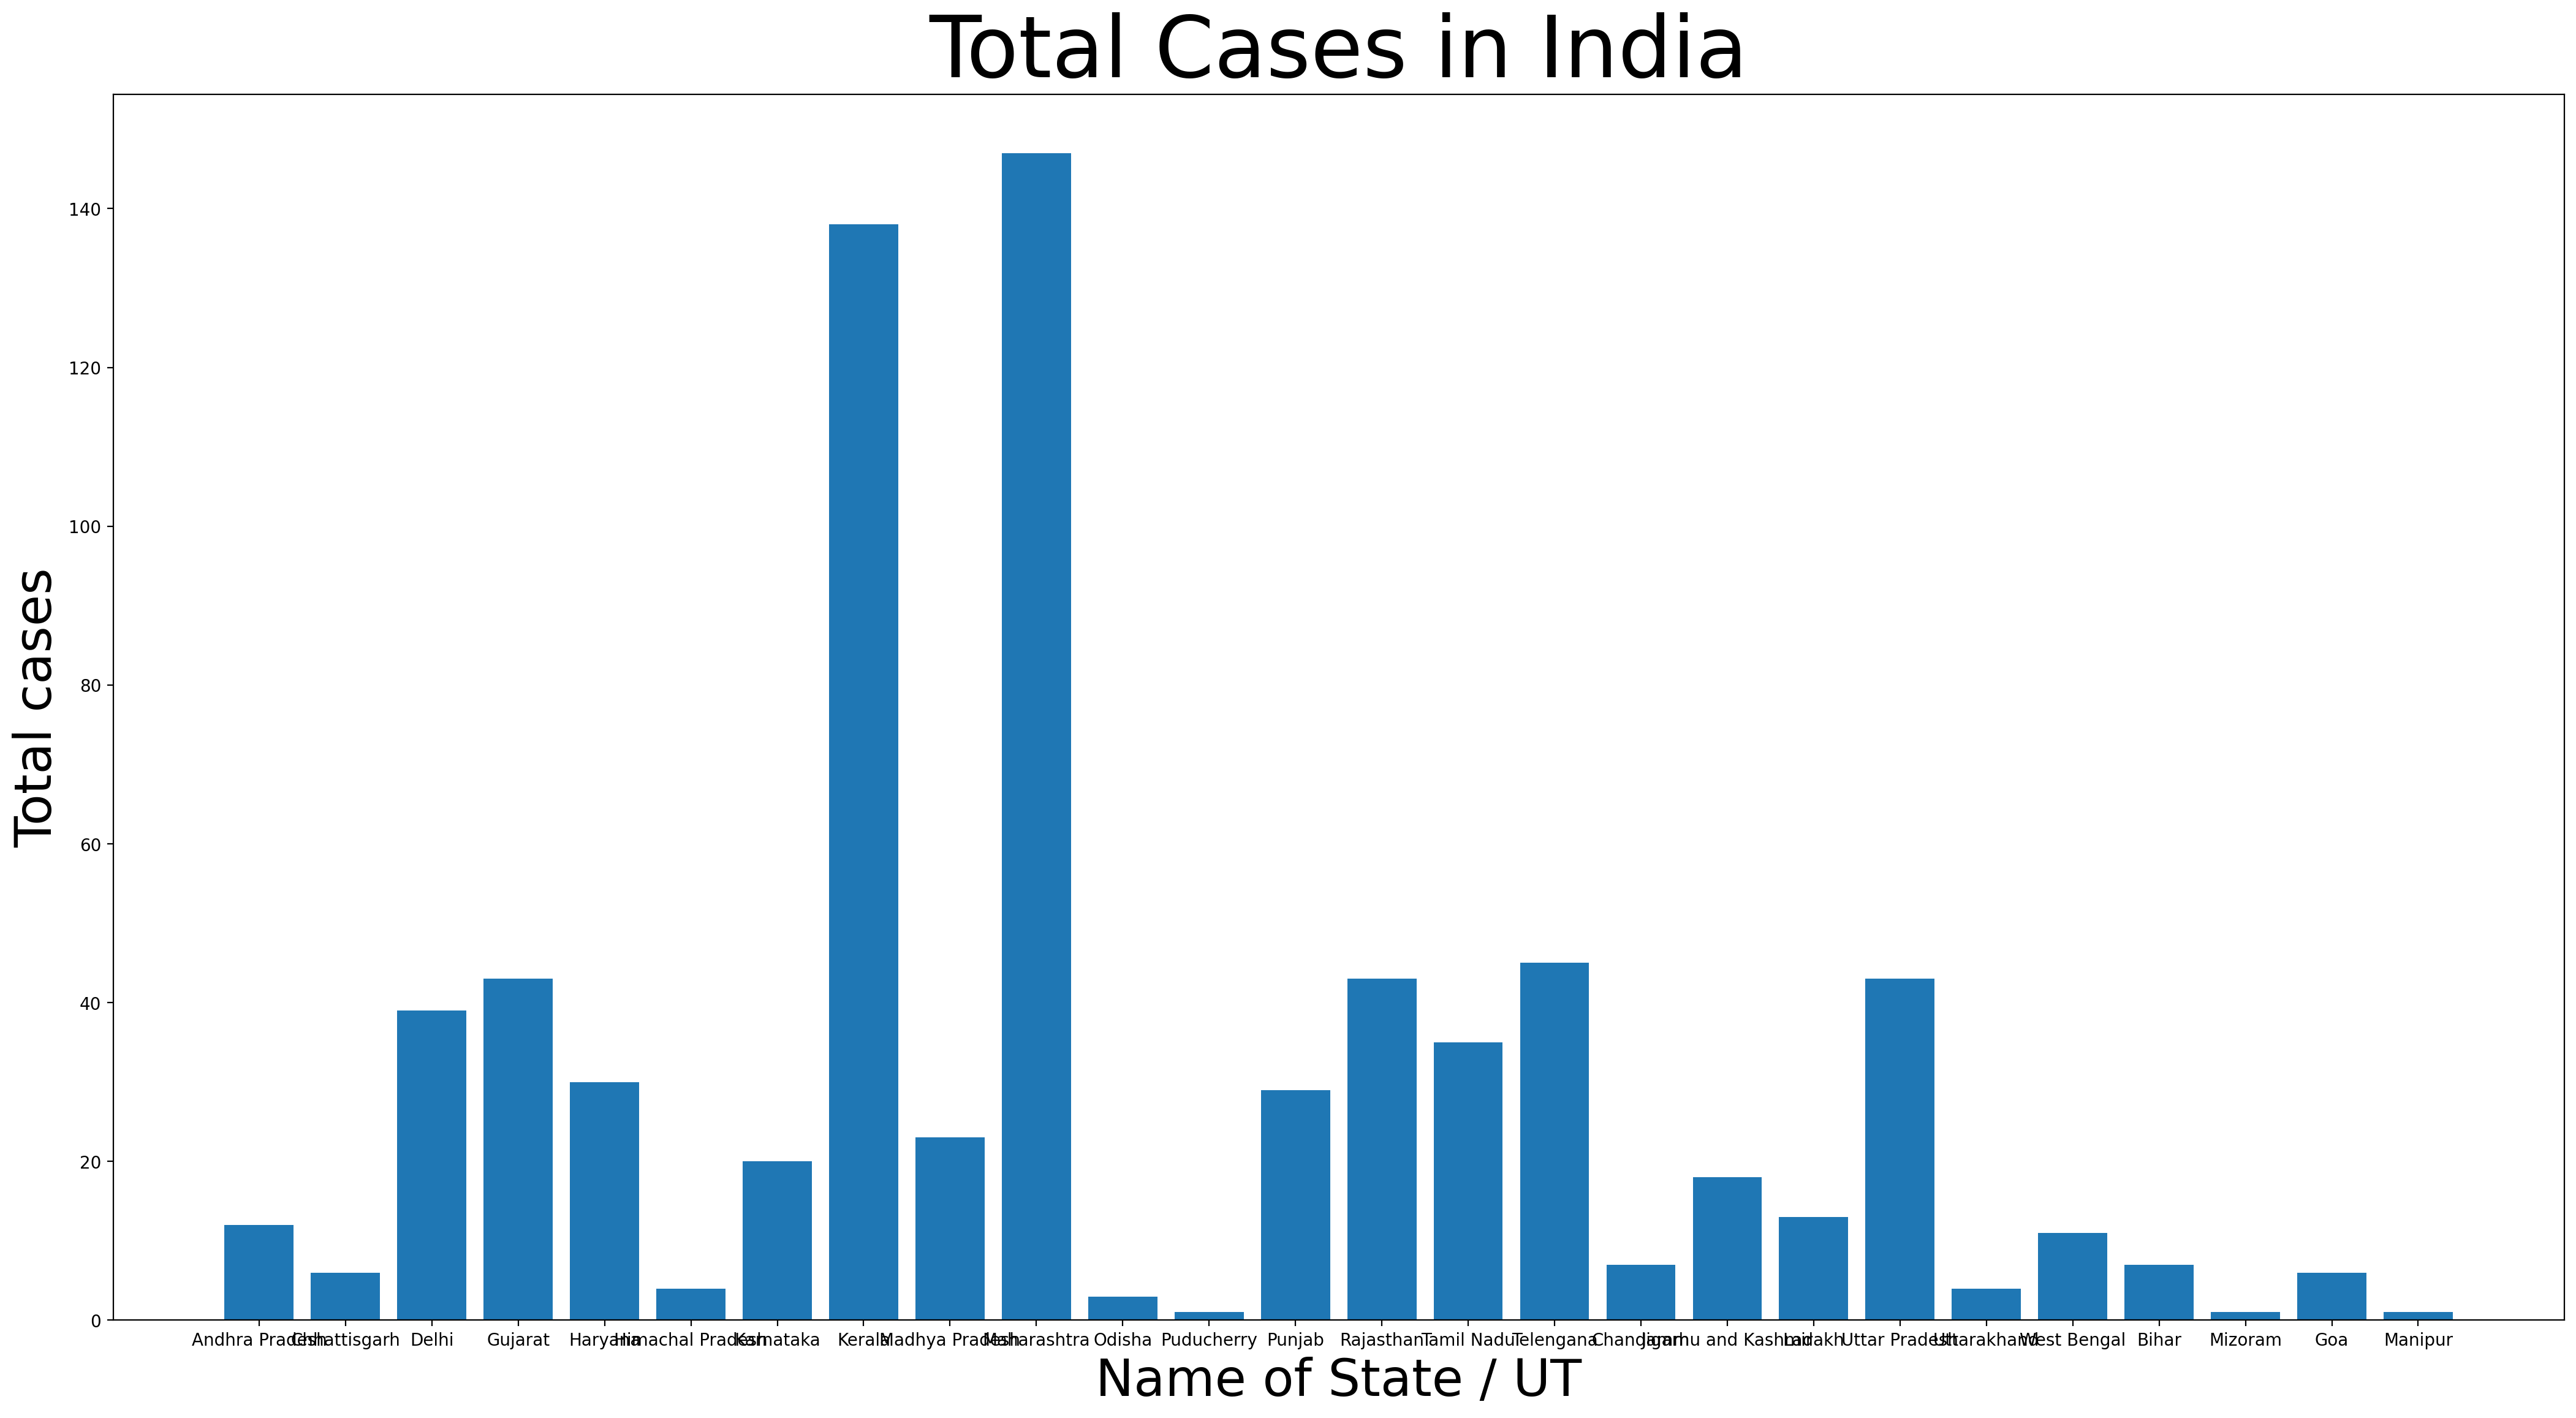

In [12]:
fig = plt.figure(figsize=(20, 10), dpi=200)
axes = fig.add_axes([0,0,1,1])
axes.bar(df['Name of State / UT'], df['Total cases'])
axes.set_title('Total Cases in India', size=50)
axes.set_xlabel('Name of State / UT', size=30)
axes.set_ylabel('Total cases', size=30)
plt.show()

In [13]:
Indian_Cord = pd.read_excel('/content/Indian Coordinates.xlsx')
Indian_Cord.head()

,Name of State / UT,Latitude,Longitude
0,Andaman And Nicobar,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973


In [14]:
df_full = pd.merge(India_coord, df, on='Name of State / UT')
df_full.head()

,Name of State / UT,Latitude,Longitude,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total cases,Total Active
0,Andhra Pradesh,14.750429,78.570026,12,0,1,0,12,11
1,Delhi,28.669993,77.230004,38,1,6,1,39,32
2,Haryana,28.450006,77.019991,16,14,11,0,30,19
3,Karnataka,12.570381,76.919997,20,0,3,2,20,15
4,Kerala,8.900373,76.569993,131,7,11,0,138,127


In [15]:
map = folium.Map(
    location=[20, 70],
    zoom_start=4,
    tiles='CartoDB positron'
)

for lat, long, value, name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Total cases'], df_full['Name of State / UT']):
    folium.CircleMarker(
        [lat, long],
        radius = (value ** 0.5) * 2,
        popup=(
            '<strong>State</strong>: ' + str(name).capitalize() + '<br>'
            '<strong>Total Cases</strong>: ' + str(value) + '<br>'
        ),
        color='red',
        fill_color='red',
        fill_opacity=0.3
    ).add_to(map)

map


In [16]:
abd_Indian = pd.read_excel('/content/per_day_cases.xlsx',parse_dates=True, sheet_name='India')
abd_Italy=pd.read_excel('/content/per_day_cases.xlsx',parse_dates=True, sheet_name='Italy')
abd_Korea=pd.read_excel('/content/per_day_cases.xlsx',parse_dates=True, sheet_name='Korea')
abd_Wuhan=pd.read_excel('/content/per_day_cases.xlsx',parse_dates=True, sheet_name='Wuhan')

In [ ]:
abd_Italy

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-31,2,2,NaN
1,2020-02-01,2,0,NaN
2,2020-02-02,2,0,NaN
3,2020-02-03,2,0,NaN
4,2020-02-04,2,0,NaN
5,2020-02-05,2,0,NaN
6,2020-02-06,3,1,NaN
7,2020-02-07,3,0,NaN
8,2020-02-08,3,0,NaN
9,2020-02-09,3,0,NaN


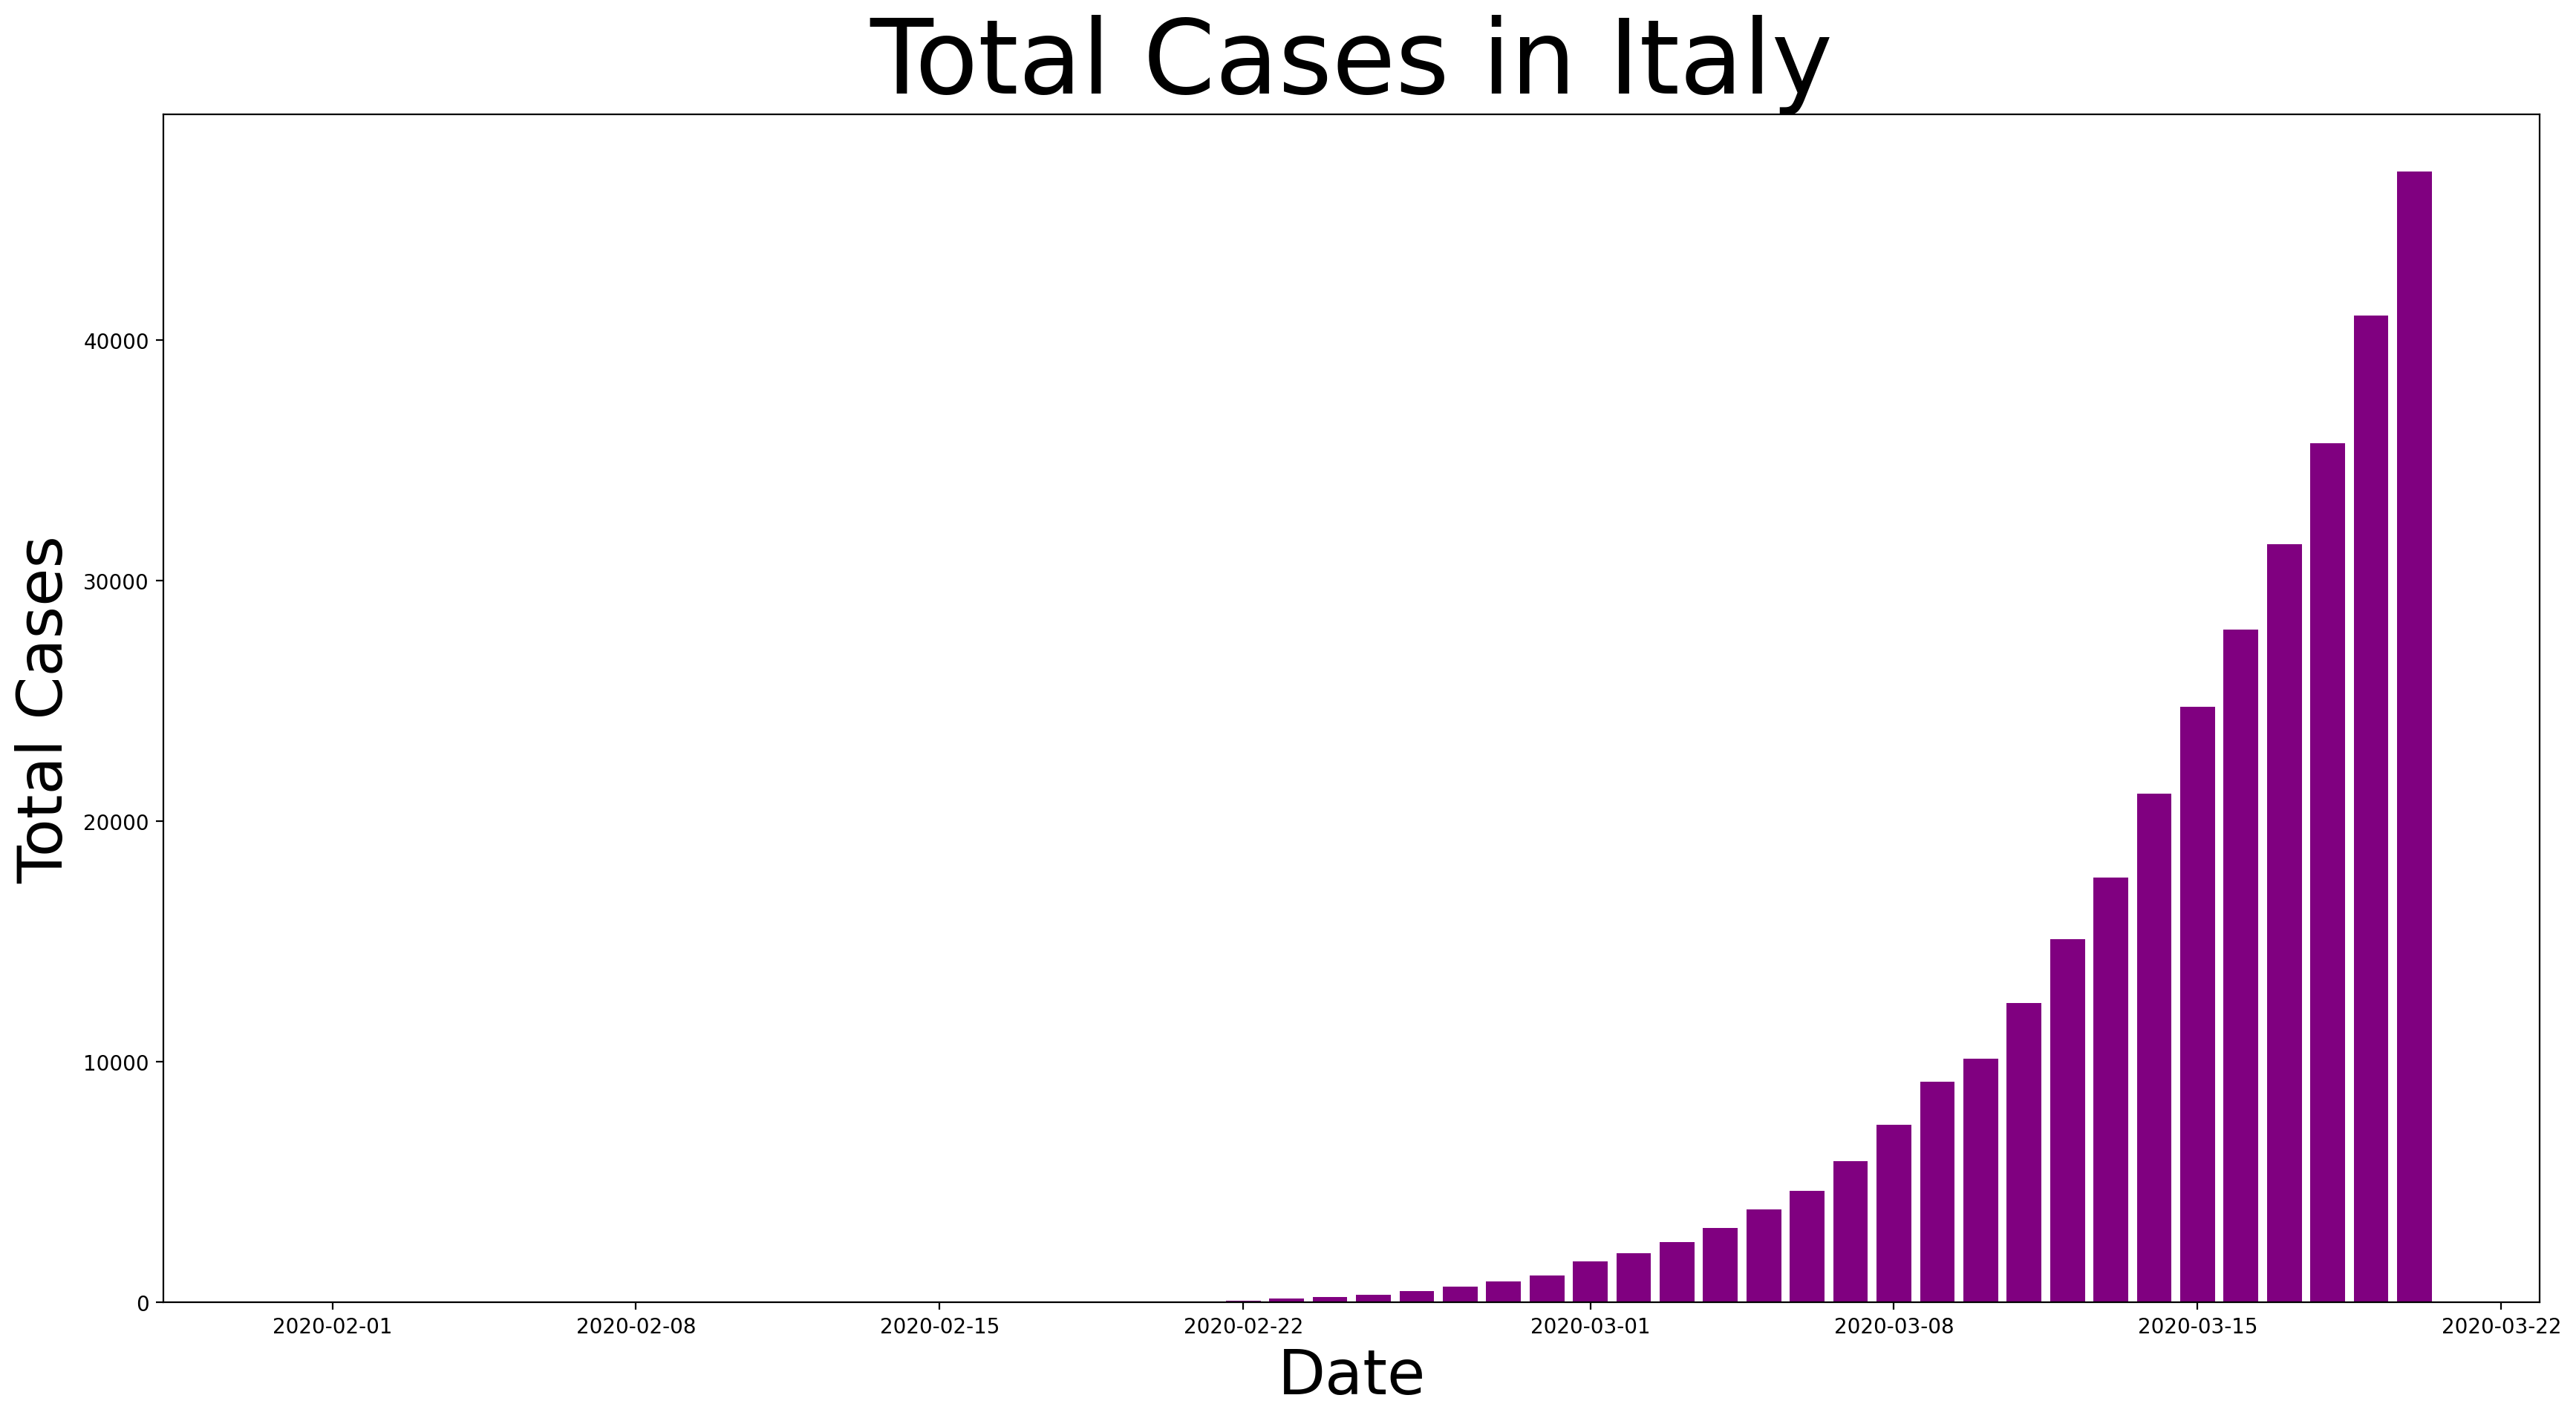

In [17]:
fig=plt.figure(figsize=(20,10), dpi=200)
axes = fig.add_axes([0.1,0.1,.8,.8])
axes.bar(abd_Italy['Date'], abd_Italy['Total Cases'], color='purple')
axes.set_title('Total Cases in Italy', size=50)
axes.set_xlabel('Date', size=30)
axes.set_ylabel('Total Cases', size=30)
plt.show()


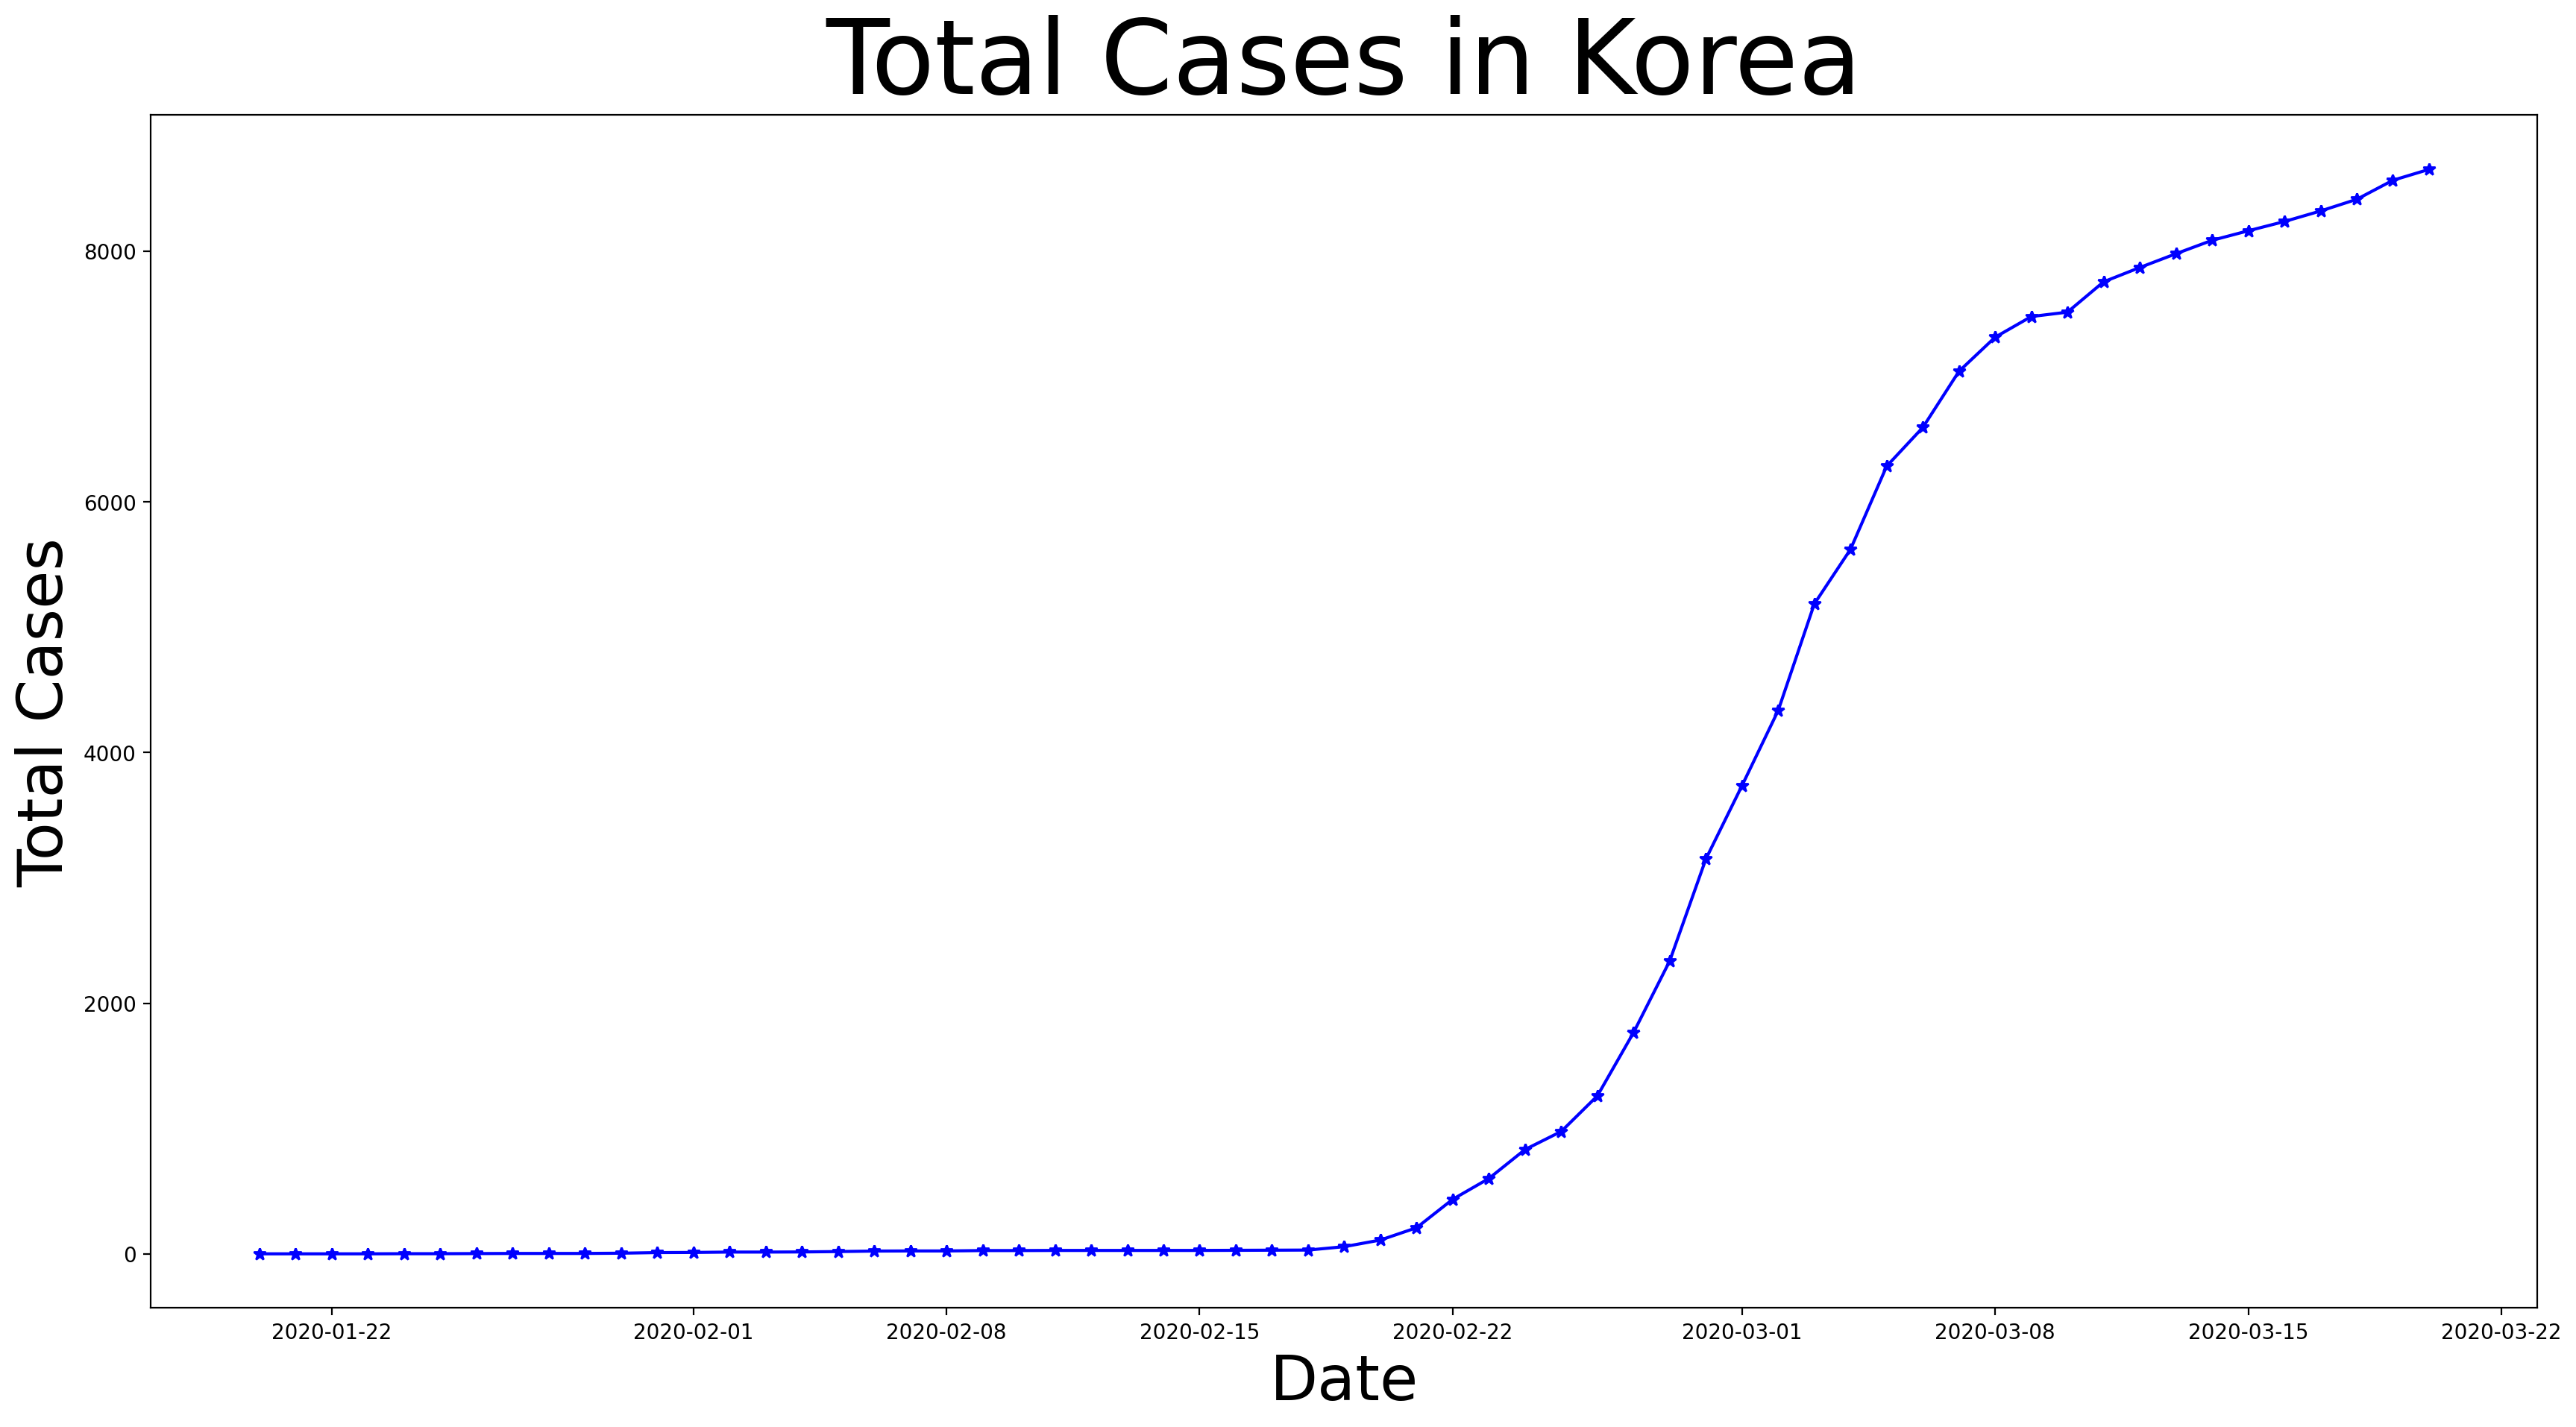

In [18]:
fig=plt.figure(figsize=(20,10), dpi=200)
axes=fig.add_axes([0.1,0.1,.8,.8])
axes.plot(abd_Korea['Date'], abd_Korea['Total Cases'], color='blue', marker='*')
axes.set_title('Total Cases in Korea', size=50)
axes.set_xlabel('Date', size=30)
axes.set_ylabel('Total Cases', size=30)
plt.show()


In [23]:
fig = px.scatter(abd_Indian, x='Date', y='Total Cases', title='Total Cases in India')
fig.update_traces(mode='lines+markers')
fig.show()


In [24]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=abd_Italy['Date'], y=abd_Italy['Total Cases'], name='Italy',mode="lines+markers"))

In [26]:
from plotly.subplots import make_subplots

In [27]:
fig=make_subplots(
    rows=2, cols=2,
    specs=[[{"secondary_y": True}, {"secondary_y": True}],
           [{"secondary_y": True}, {"secondary_y": True}]],
    subplot_titles=("Total Cases in India", "Total Cases in Italy", "Total Cases in Korea", "Total Cases in Wuhan"))

fig.add_trace(go.Bar(x=abd_Korea['Date'], y=abd_Korea['Total Cases'],
                     marker=dict(color=abd_Italy['Total Cases'], coloraxis='coloraxis')), 1,1)

fig.add_trace(go.Bar(x=abd_Italy['Date'], y=abd_Italy['Total Cases'],
                     marker=dict(color=abd_Italy['Total Cases'], coloraxis='coloraxis')), 1,2)

fig.add_trace(go.Bar(x=abd_Indian['Date'], y=abd_Indian['Total Cases'],
                     marker=dict(color=abd_Indian['Total Cases'], coloraxis='coloraxis')),2,1)

fig.add_trace(go.Bar(x=abd_Wuhan['Date'], y=abd_Wuhan['Total Cases'],
                     marker=dict(color=abd_Wuhan['Total Cases'], coloraxis='coloraxis')),2,2)

fig.update_layout(coloraxis=dict(colorscale='Bluered'), showlegend=False, title_text="Total Cases in India, Italy, Korea and Wuhan")

fig.update_layout(plot_bgcolor='rgb(230, 230,230)')
fig.show()



In [31]:
fig=make_subplots(
    rows=2, cols=2,
    specs=[[{"secondary_y": True}, {"secondary_y": True}],
           [{"secondary_y": True}, {"secondary_y": True}]],
    subplot_titles=("Total Cases in India", "Total Cases in Italy", "Total Cases in Korea", "Total Cases in Wuhan"))

fig.add_trace(go.Scatter(x=abd_Korea['Date'], y=abd_Korea['Total Cases'],
                     marker=dict(color=abd_Italy['Total Cases'], coloraxis='coloraxis')), 1,1)

fig.add_trace(go.Scatter(x=abd_Italy['Date'], y=abd_Italy['Total Cases'],
                     marker=dict(color=abd_Italy['Total Cases'], coloraxis='coloraxis')), 1,2)

fig.add_trace(go.Scatter(x=abd_Indian['Date'], y=abd_Indian['Total Cases'],
                     marker=dict(color=abd_Indian['Total Cases'], coloraxis='coloraxis')),2,1)

fig.add_trace(go.Scatter(x=abd_Wuhan['Date'], y=abd_Wuhan['Total Cases'],
                     marker=dict(color=abd_Wuhan['Total Cases'], coloraxis='coloraxis')),2,2)

fig.update_layout(coloraxis=dict(colorscale='Bluered'), showlegend=False)

fig.update_layout(plot_bgcolor='rgb(230, 230,230)')
fig.show()



In [42]:
df = pd.read_csv('/content/covid_19_data.csv', parse_dates=['ObservationDate', 'Last Update'])

In [43]:
df.rename(columns={'ObservationDate': 'Date', 'Country/Region': 'Country'}, inplace=True)

In [44]:
df

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
5885,5886,2020-03-15,Gibraltar,UK,2020-03-14T16:33:03,1.0,0.0,1.0
5886,5887,2020-03-15,NaN,Uzbekistan,2020-03-15T18:20:19,1.0,0.0,0.0
5887,5888,2020-03-15,Diamond Princess cruise ship,Australia,2020-03-14T02:33:04,0.0,0.0,0.0
5888,5889,2020-03-15,West Virginia,US,2020-03-10T02:33:04,0.0,0.0,0.0


In [45]:
df.query('Country == "UK"')

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
481,482,2020-01-31,NaN,UK,1/31/2020 23:59,2.0,0.0,0.0
541,542,2020-02-01,NaN,UK,2/1/2020 1:52,2.0,0.0,0.0
611,612,2020-02-02,NaN,UK,2020-02-01T01:52:40,2.0,0.0,0.0
678,679,2020-02-03,NaN,UK,2020-02-01T01:52:40,2.0,0.0,0.0
746,747,2020-02-04,NaN,UK,2020-02-01T01:52:40,2.0,0.0,0.0
817,818,2020-02-05,NaN,UK,2020-02-01T01:52:40,2.0,0.0,0.0
888,889,2020-02-06,NaN,UK,2020-02-01T01:52:40,2.0,0.0,0.0
957,958,2020-02-07,NaN,UK,2020-02-07T18:33:02,3.0,0.0,0.0
1029,1030,2020-02-08,NaN,UK,2020-02-07T18:33:02,3.0,0.0,0.0
1101,1102,2020-02-09,NaN,UK,2020-02-07T18:33:02,3.0,0.0,0.0


In [46]:
df.groupby('Date')['Confirmed'].sum()

,Confirmed
Date,
2020-01-22,555.0
2020-01-23,653.0
2020-01-24,941.0
2020-01-25,1438.0
2020-01-26,2118.0
2020-01-27,2927.0
2020-01-28,5578.0
2020-01-29,6165.0
2020-01-30,8235.0


In [47]:
confirmed=df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [51]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=confirmed['Date'],
    y=confirmed['Confirmed'],
    mode='lines+markers',
    name='Confirmed',
    line=dict(color='blue', width=2)
))

fig.add_trace(go.Scatter(
    x=deaths['Date'],
    y=deaths['Deaths'],
    mode='lines+markers',
    name='Deaths',
    line=dict(color='red', width=2)
))

fig.add_trace(go.Scatter(
    x=recovered['Date'],
    y=recovered['Recovered'],
    mode='lines+markers',
    name='Recovered',
    line=dict(color='green', width=2)
))

fig.show()


In [55]:
df_confirmed = pd.read_csv('/content/time_series_covid_19_confirmed.csv')

In [56]:
df_confirmed.rename(columns={'Country/Region': 'Country'}, inplace=True)

In [59]:
df_latlong=pd.merge(df, df_confirmed, on=['Country', 'Province/State'])

In [60]:
df_latlong

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Lat,Long,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,32,2020-01-22,Washington,US,1/22/2020 17:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
1,36,2020-01-22,NaN,Japan,1/22/2020 17:00,2.0,0.0,0.0,36.0000,138.0000,...,360,420,461,502,511,581,639,639,701,773
2,37,2020-01-22,NaN,Thailand,1/22/2020 17:00,2.0,0.0,0.0,15.0000,101.0000,...,47,48,50,50,50,53,59,70,75,82
3,70,2020-01-23,Washington,US,1/23/20 17:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
4,74,2020-01-23,NaN,Japan,1/23/20 17:00,1.0,0.0,0.0,36.0000,138.0000,...,360,420,461,502,511,581,639,639,701,773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3288,5883,2020-03-15,Alaska,US,2020-03-13T14:53:03,1.0,0.0,0.0,61.3707,-152.4044,...,0,0,0,0,0,0,0,0,1,1
3289,5884,2020-03-15,North Dakota,US,2020-03-12T09:33:03,1.0,0.0,0.0,47.5289,-99.7840,...,0,0,0,0,0,0,0,1,1,1
3290,5885,2020-03-15,"Virgin Islands, U.S.",US,2020-03-14T16:15:18,1.0,0.0,0.0,18.3358,-64.8963,...,0,0,0,0,0,0,0,0,0,1
3291,5889,2020-03-15,West Virginia,US,2020-03-10T02:33:04,0.0,0.0,0.0,38.4912,-80.9545,...,0,0,0,0,0,0,0,0,0,0


In [64]:
import plotly.express as px

# إصلاح المشاكل
df_latlong = df_latlong.dropna(subset=['Lat', 'Long', 'Confirmed'])
df_latlong['Province/State'] = df_latlong['Province/State'].fillna("Unknown")

fig = px.scatter_mapbox(
    df_latlong,
    lat='Lat',
    lon='Long',
    hover_name="Province/State",
    hover_data=["Confirmed", "Deaths", "Recovered"],
    color="Confirmed",
    size="Confirmed",
    animation_frame="Date",
    zoom=1,
    height=700
)

fig.update_layout(mapbox_style="open-street-map")
fig.update_traces(marker=dict(opacity=0.7))

fig.show()
